In [1]:
import numpy as np

N = 100
D = 2

X = np.random.randn(N,D)
ones = np.ones((N, 1))

# ================= часть 1 ==========

# конкатенируйте в одной переменной X и ones 

In [2]:
X = np.concatenate((X, ones), axis=1)
X.shape

(100, 3)

# создайте случайный вектор весов w нужной размерности

In [3]:
w = np.random.randn(D + 1, 1)
w.shape

(3, 1)

# вычислите $z = w^Tx$

In [4]:
z = X @ w
z.shape

(100, 1)

# вычислите $\sigma(z)$ (предварительно реализуйте функцию sigmoid)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ================= часть 2 ==========

In [6]:

import numpy as np
N = 100
D = 2

# генерация датасета

np.random.seed(42)
X = np.random.randn(N, D)
ones = np.ones((N, 1))

X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# метки из train set
T = np.array([0]*50 + [1]*50)

# данные из части 1
ones = np.ones((N, 1))

Xb = np.concatenate((ones, X), axis=1)
w = np.random.randn(D + 1)
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# реализуйте функцию: def cross_entropy(T, Y):

In [7]:
def cross_entropy(T, Y):
  return -1 * np.array([t * np.log(y) + (1 - t) * np.log(1 - y) for t, y in zip(T, Y)]).mean()

In [8]:
print(cross_entropy(T, Y))
...

0.060301620601623994


## задайте веса с помощью точного решения [0,-4,-4]

In [9]:
#отделяем данные по значению
X_0 = X[T == 0]
X_1 = X[T == 1]

#формируем Sigma как матрица ковариации, при этом обнуляя не диагональные элементы
Sigma = np.cov(X_0.T)
Sigma[1][0] = 0
Sigma[0][1] = 0

print('Sigma\n',Sigma)

mu_1 = np.array([X0.mean() for X0 in X_0.T])
mu_2 = np.array([X1.mean() for X1 in X_1.T])
Sigma_inv = np.linalg.inv(Sigma) #нахождения обратной матрицы Сигма согласно формуле 

print('Sigma inversed\n',Sigma_inv)

w = (mu_2 - mu_1) @ Sigma_inv
print('W',w)
alpha = len(X_0) / len(X)

b = 1/2 * mu_1.T @ Sigma_inv @ mu_1 - 1/2 * mu_2.T @ Sigma_inv @ mu_2 + np.log(alpha / (1 - alpha))

print('b',b)


Sigma
 [[0.69631545 0.        ]
 [0.         0.96798885]]
Sigma inversed
 [[1.43613072 0.        ]
 [0.         1.03306976]]
W [5.802288  4.3513719]
b 0.5224933024235856


# вычислите z и Y

In [10]:
z = X.dot(w) + b
Y = sigmoid(z)

# вычислите cross_entropy(T, Y)

In [11]:
cross_entropy(T, Y)

1.5288868989303075e-05

# ================ часть 3 ==============

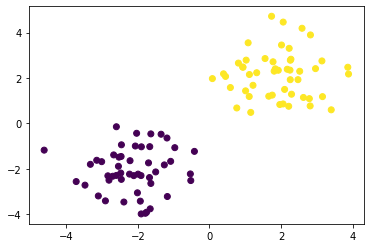

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=T)

# выполните 100 итераций градиентного спуска
### $J = crossentr + \frac{1}{2} \alpha w^Tw$

In [55]:
w = np.array([0, 1, 1])
loss = []
epochs = 100
lrate = 0.1
for epoch in range(epochs):
  prediction = sigmoid(Xb.dot(w.T))
  loss.append(cross_entropy(T, prediction))
  w = w - lrate * Xb.T @ (prediction - T)

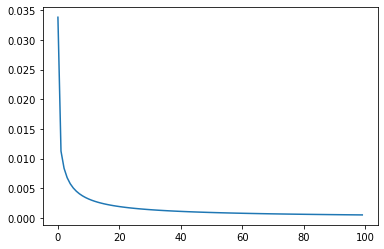

In [56]:
plt.plot(range(epochs), loss)


# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

In [58]:
print('Weights: ', w)
print('Cross Entropy: ', cross_entropy(T, sigmoid(Xb.dot(w.T))))

Weights:  [0.07612547 2.99941236 2.95035906]
Cross Entropy:  0.0005143453959422416


# =========== часть 4 =============
# добавьте регуляризацию $L_2$

In [60]:
L2_loss = []
w = np.array([0, 1, 1])
epochs = 100
lrate = 0.1
r = 0.001
for epoch in range(epochs):
  prediction = sigmoid(Xb.dot(w.T))
  L2_term = 1/2 * r * w @ w.T / len(prediction)
  L2_loss.append(cross_entropy(T, prediction) + L2_term)
  w = w - lrate * (Xb.T @ (prediction - T) + r * w / len(prediction))
print('Weights: ', w)
print('Cross Entropy: ', cross_entropy(T, sigmoid(Xb.dot(w.T))))

Weights:  [0.07612199 2.99926604 2.95021353]
Cross Entropy:  0.0005144826496048379


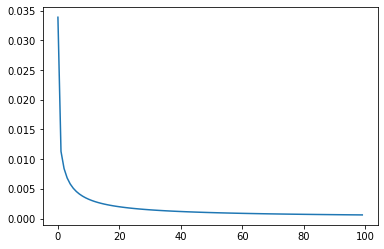

In [61]:
plt.plot(range(epochs), L2_loss)

# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

w: [0.07612199 2.99926604 2.95021353]
b: 0.025802195241373154
x1: -1.0166267670577063
yy: [ 6.07395841  5.82498859  5.57601877  5.32704895  5.07807913  4.8291093
  4.58013948  4.33116966  4.08219984  3.83323002  3.5842602   3.33529038
  3.08632056  2.83735074  2.58838092  2.3394111   2.09044128  1.84147146
  1.59250164  1.34353182  1.094562    0.84559218  0.59662236  0.34765254
  0.09868272 -0.15028711 -0.39925693 -0.64822675 -0.89719657 -1.14616639
 -1.39513621 -1.64410603 -1.89307585 -2.14204567 -2.39101549 -2.63998531
 -2.88895513 -3.13792495 -3.38689477 -3.63586459 -3.88483441 -4.13380423
 -4.38277405 -4.63174387 -4.8807137  -5.12968352 -5.37865334 -5.62762316
 -5.87659298 -6.1255628 ]


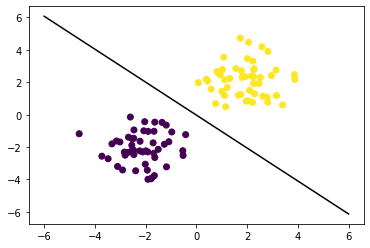

In [62]:
plt.scatter(X[:,0], X[:,1], c=T)

print('w:', w)
xx = np.linspace(-6, 6)
b = w[0]/w[2]
x1 = -w[1]/w[2]
yy = x1 * xx - b

print('b:', b)
print('x1:', x1)
print('yy:', yy)

plt.plot(xx, yy, 'k-')